In [178]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [179]:
# img = cv2.imread("images/General Radahn.jpg")
# img = cv2.imread("images/test.jpg")
# img = cv2.imread("images/bg.png")
img = cv2.imread("images/fondvert.png")
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab_img = lab_img.transpose(2,0,1).reshape(3,-1)
df = pd.DataFrame(lab_img.T)
df

,0,1,2
0,25,154,49
1,25,154,49
2,25,154,49
3,25,156,52
4,25,156,52
...,...,...,...
112891,24,155,49
112892,24,155,49
112893,24,155,49
112894,24,155,49


In [180]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [181]:
print(kmeans.cluster_centers_)

[[ 58.40179815 184.2824479   86.70409468]
 [210.69736637 173.65739442 145.45776843]
 [153.51663028 117.60010274  85.45165019]
 [235.84088398 233.46703499 230.67053407]
 [ 54.38012545  55.46149379  54.39540016]]


In [182]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

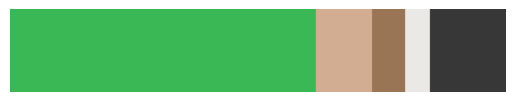

In [183]:
hist = centroid_histogram(kmeans)
bar = plot_colors(hist, kmeans.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()